![image](./T6.jpg)

In [174]:
import numpy as np
from seaborn import boxplot
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from scipy import stats
from seaborn import boxplot
import scipy as sp

In [175]:
def foo(sample, theta):
    return (1 - sample) ** (1 / (1 - theta))

In [176]:
n = 100
theta_true = 10
betta = 0.95

sample = np.array([foo(data, theta_true) for data in np.random.sample(n)])
sample.sort()
print(f'{sample=}')

sample=array([1.0011358 , 1.00187762, 1.0019496 , 1.00274821, 1.00349109,
       1.00434657, 1.00603123, 1.00733826, 1.00759831, 1.0084226 ,
       1.00935092, 1.01077101, 1.01115182, 1.01715463, 1.02190548,
       1.02271799, 1.02344827, 1.02631644, 1.02673203, 1.0274558 ,
       1.02788626, 1.02804102, 1.02856279, 1.0290332 , 1.0301451 ,
       1.03045661, 1.03287345, 1.03533388, 1.03572002, 1.03660839,
       1.03666974, 1.0376172 , 1.03829392, 1.04141525, 1.04214621,
       1.04246555, 1.0436111 , 1.04520722, 1.047366  , 1.04784866,
       1.04918248, 1.04960465, 1.04977974, 1.05407574, 1.05435476,
       1.05511671, 1.05532259, 1.05775884, 1.06051913, 1.06252073,
       1.06305233, 1.06678276, 1.08495784, 1.08508868, 1.08536712,
       1.08876652, 1.09096762, 1.09729183, 1.10003947, 1.10364527,
       1.11948071, 1.12268103, 1.12619609, 1.12666202, 1.13380199,
       1.1347731 , 1.13536607, 1.13725292, 1.14814622, 1.14854168,
       1.15034269, 1.1509814 , 1.16086546, 1.16285425, 

In [177]:
theta = n/np.sum(np.log(sample))+1
print(theta)

9.54063910962002


In [178]:
btst_iter = 1000
btst_sample = sample[np.random.choice(len(sample), size=(btst_iter, len(sample)))]
print(f"{btst_sample=}")

btst_sample=array([[1.0011358 , 1.03287345, 2.18024163, ..., 1.38974709, 1.02344827,
        2.04286117],
       [1.03045661, 1.28348566, 1.2818995 , ..., 1.15034269, 1.02190548,
        1.21556752],
       [1.08536712, 1.12666202, 1.38228545, ..., 1.06305233, 1.32016533,
        1.06305233],
       ...,
       [1.0011358 , 1.34885782, 1.0019496 , ..., 1.02190548, 1.04960465,
        1.00733826],
       [1.09096762, 1.15034269, 1.16285425, ..., 1.0376172 , 1.03045661,
        1.0290332 ],
       [1.03572002, 1.04214621, 1.0011358 , ..., 1.18087434, 1.1937329 ,
        1.00434657]])


In [179]:
param_btst_iter = 50_000
param_btst_sample = np.array([np.array([foo(data, theta) for data in np.random.sample(n)]) for _ in range(param_btst_iter)])
print(f'{param_btst_sample=}')

param_btst_sample=array([[1.1426137 , 1.05662466, 1.26754098, ..., 1.28874477, 1.05359744,
        1.04327099],
       [1.146101  , 1.00764796, 1.19160979, ..., 1.32048674, 1.0730579 ,
        1.14606495],
       [1.09393317, 1.05098735, 1.06023186, ..., 1.15578205, 1.02693792,
        1.27524268],
       ...,
       [1.14570999, 1.08974334, 1.04916883, ..., 1.03357111, 1.24304886,
        1.01090891],
       [1.39072043, 1.15276038, 1.02033248, ..., 1.22041464, 1.04428012,
        1.08001233],
       [1.06942897, 1.27680209, 1.08296171, ..., 1.18376344, 1.21859415,
        1.00332832]])


In [180]:
def get_confidence_interval(btst_sample):
    delta = []
    for btst_sample_i in btst_sample:
        delta.append(n/np.sum(np.log(btst_sample_i))+1 - theta)
    delta = np.sort(np.array(delta))
    btst_t1 = delta[int(btst_iter * (1 - betta)/2)]
    btst_t2 = delta[int(btst_iter * (1 + betta)/2)]

    btst_left = theta - btst_t2
    btst_right = theta - btst_t1
    return btst_left, btst_right

In [181]:
assymptotic_left = n**(3/2)/(1.96+np.sqrt(n))/np.sum(np.log(sample))
assymptotic_right = n**(3/2)/(-1.96+np.sqrt(n))/np.sum(np.log(sample))
print(f"ассимптотический д.и.:{assymptotic_left} <= theta <= {assymptotic_right}, l:{assymptotic_right - assymptotic_left}")
btst_left, btst_right = get_confidence_interval(btst_sample)
print(f"непараметрический бутстраповский д.и.:{btst_left} <= theta <= {btst_right}, l:{btst_right - btst_left}")
param_btst_left, param_btst_right = get_confidence_interval(param_btst_sample)
print(f"параметрический бутстраповский д.и.:{param_btst_left} <= theta <= {param_btst_right}, l:{param_btst_right - param_btst_left}")

ассимптотический д.и.:7.14100260001674 <= theta <= 10.622685459726394, l:3.4816828597096547
непараметрический бутстраповский д.и.:7.322720258719476 <= theta <= 11.23391293525922, l:3.911192676539743
параметрический бутстраповский д.и.:11.067146847209807 <= theta <= 11.777975251440244, l:0.7108284042304369


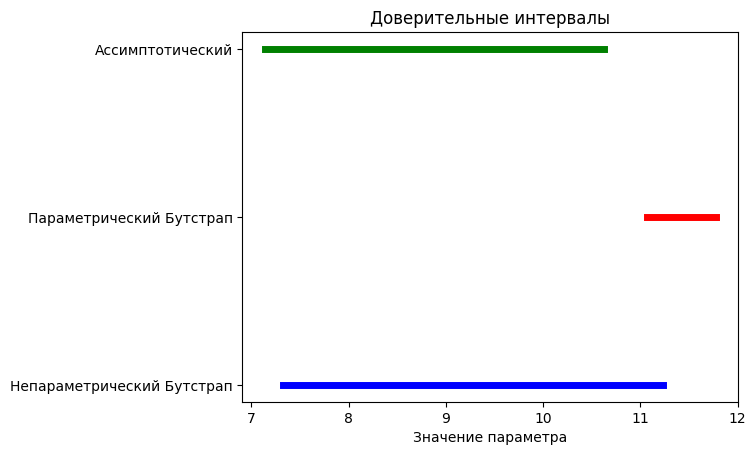

In [182]:
x1 = np.linspace(btst_left, btst_right, 100)
y1 = [1] * 100 
x2 = np.linspace(param_btst_left, param_btst_right, 100)
y2 = [2] * 100 
x3 = np.linspace(assymptotic_left, assymptotic_right, 100)
y3 = [3] * 100

plt.plot(x1, y1, color="blue", linewidth=5)
plt.plot(x2, y2, color="red", linewidth=5)
plt.plot(x3, y3, color="green", linewidth=5)

plt.yticks([1, 2, 3], ["Непараметрический Бутстрап", "Параметрический Бутстрап", "Ассимптотический"])
plt.xlabel("Значение параметра")
plt.title("Доверительные интервалы")

plt.show()